## Assignment 3: investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pylab as pl;
%pylab inline

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


## 1. DATA

In [3]:
#download all the datasets
os.system("curl -O https://raw.githubusercontent.com/baolingz/PUI2017_bz882/master/HW5_bz882/World%20firearms%20murders.csv")
os.system("mv " + "World%20firearms%20murders.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/baolingz/PUI2017_bz882/master/HW5_bz882/mass%20shooting.csv")
os.system("mv " + "mass%20shooting.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/baolingz/PUI2017_bz882/master/HW5_bz882/world_gdp.csv")
os.system("mv " + "world_gdp.csv " + os.getenv("PUIDATA"))
os.system("curl -O https://raw.githubusercontent.com/baolingz/PUI2017_bz882/master/HW5_bz882/world_pop.csv")
os.system("mv " + "world_pop.csv " + os.getenv("PUIDATA"))

0

In [69]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + "World%20firearms%20murders.csv")
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + "mass%20shooting.csv")
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + "world_gdp.csv")
df4 = pd.read_csv(os.getenv("PUIDATA") + "/" + "world_pop.csv")

In [3]:
df1.head()

Country/Territory ISO code               Source  % of homicides by firearm  \
0           Albania       AL                  CTS                       65.9   
1           Algeria       DZ                  CTS                        4.8   
2            Angola       AO                  NaN                        NaN   
3          Anguilla       AI              WHO-MDB                       24.0   
4         Argentina       AR  Ministry of Justice                       52.0   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            56.0                                      1.76   
1                            20.0                                      0.06   
2                             NaN                                       NaN   
3                             1.0                                      7.14   
4                          1198.0                                      3.02   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       70.0                              8.6   
1                       78.0                              7.6   
2                       34.0                             17.3   
3                        NaN                              NaN   
4                       62.0                             10.2   

   Average total all civilian firearms  
0                             270000.0  
1                            1900000.0  
2                            2800000.0  
3                                  NaN  
4                            3950000.0

In [4]:
df2.head()

Country  Guns/100 inhabitants  Number of mass shootings
0  Australia                  15.0                         4
1    Austria                  30.4                         1
2   Beligium                  17.2                         2
3     Canada                  30.8                         4
4    Denmark                  12.0                         0

In [7]:
df3.head()

Country Name          2012
0        Aruba           NaN
1  Afghanistan  2.053654e+10
2       Angola  1.150000e+11
3      Albania  1.231978e+10
4      Andorra  3.146152e+09

In [8]:
df4.head()

Country Name        2012
0        Aruba    102577.0
1  Afghanistan  30696958.0
2       Angola  25096150.0
3      Albania   2900401.0
4      Andorra     82431.0

In [70]:
type(df4['2012'].iloc[0])

numpy.float64

## 2. Exploration

In [71]:
df = df1.merge(df2, right_on="Country", left_on="Country/Territory")
df.head()

Country/Territory ISO code Source  % of homicides by firearm  \
0         Australia       AU    NSO                       11.5   
1           Austria       AT    CTS                       29.5   
2            Canada       CA    CTS                       32.0   
3           Denmark       DK    CTS                       31.9   
4           Finland       FI    CTS                       19.8   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            30.0                                      0.14   
1                            18.0                                      0.22   
2                           173.0                                      0.51   
3                            15.0                                      0.27   
4                            24.0                                      0.45   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       42.0                             15.0   
1                       14.0                             30.4   
2                       13.0                             30.8   
3                       54.0                             12.0   
4                        4.0                             45.3   

   Average total all civilian firearms    Country  Guns/100 inhabitants  \
0                            3050000.0  Australia                  15.0   
1                            2500000.0    Austria                  30.4   
2                            9950000.0     Canada                  30.8   
3                             650000.0    Denmark                  12.0   
4                            2400000.0    Finland                  45.3   

   Number of mass shootings  
0                         4  
1                         1  
2                         4  
3                         0  
4                         2

In [72]:
df = df.merge(df3, right_on="Country Name", left_on="Country/Territory")

In [73]:
df = df.merge(df4, right_on="Country Name", left_on="Country/Territory")
df.head()

Country/Territory ISO code Source  % of homicides by firearm  \
0         Australia       AU    NSO                       11.5   
1           Austria       AT    CTS                       29.5   
2            Canada       CA    CTS                       32.0   
3           Denmark       DK    CTS                       31.9   
4           Finland       FI    CTS                       19.8   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            30.0                                      0.14   
1                            18.0                                      0.22   
2                           173.0                                      0.51   
3                            15.0                                      0.27   
4                            24.0                                      0.45   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       42.0                             15.0   
1                       14.0                             30.4   
2                       13.0                             30.8   
3                       54.0                             12.0   
4                        4.0                             45.3   

   Average total all civilian firearms    Country  Guns/100 inhabitants  \
0                            3050000.0  Australia                  15.0   
1                            2500000.0    Austria                  30.4   
2                            9950000.0     Canada                  30.8   
3                             650000.0    Denmark                  12.0   
4                            2400000.0    Finland                  45.3   

   Number of mass shootings Country Name_x        2012_x Country Name_y  \
0                         4      Australia  1.540000e+12      Australia   
1                         1        Austria  4.070000e+11        Austria   
2                         4         Canada  1.820000e+12         Canada   
3                         0        Denmark  3.270000e+11        Denmark   
4                         2        Finland  2.570000e+11        Finland   

       2012_y  
0  22728254.0  
1   8429991.0  
2  34750545.0  
3   5591572.0  
4   5413971.0

In [18]:
df.count()

Country/Territory                           156
ISO code                                    155
Source                                       99
% of homicides by firearm                    99
Number of homicides by firearm               99
Homicide by firearm rate per 100,000 pop     99
Rank by rate of ownership                   151
Average firearms per 100 people             151
Average total all civilian firearms         151
Country Name_x                              156
2012_x                                      152
Country Name_y                              156
2012_y                                      155
Country Name_x                              156
2012_x                                      152
Country Name_y                              156
2012_y                                      155
dtype: int64

In [74]:
type(df['2012_y'].iloc[0])

numpy.float64

In [75]:
df = df.drop(['ISO code', 'Average firearms per 100 people', 'Country','Source', '% of homicides by firearm','Homicide by firearm rate per 100,000 pop','Rank by rate of ownership','Country Name_x','Country Name_y'],axis = 1)

In [76]:
df.head()

Country/Territory  Number of homicides by firearm  \
0         Australia                            30.0   
1           Austria                            18.0   
2            Canada                           173.0   
3           Denmark                            15.0   
4           Finland                            24.0   

   Average total all civilian firearms  Guns/100 inhabitants  \
0                            3050000.0                  15.0   
1                            2500000.0                  30.4   
2                            9950000.0                  30.8   
3                             650000.0                  12.0   
4                            2400000.0                  45.3   

   Number of mass shootings        2012_x      2012_y  
0                         4  1.540000e+12  22728254.0  
1                         1  4.070000e+11   8429991.0  
2                         4  1.820000e+12  34750545.0  
3                         0  3.270000e+11   5591572.0  
4                         2  2.570000e+11   5413971.0

In [77]:
type(df['2012_y'].iloc[0])

numpy.float64

In [78]:
df = df.rename(columns={'Country/Territory': 'Country Name', '2012_x': 'gdp', '2012_y': 'pop'})
df.head()

Country Name  Number of homicides by firearm  \
0    Australia                            30.0   
1      Austria                            18.0   
2       Canada                           173.0   
3      Denmark                            15.0   
4      Finland                            24.0   

   Average total all civilian firearms  Guns/100 inhabitants  \
0                            3050000.0                  15.0   
1                            2500000.0                  30.4   
2                            9950000.0                  30.8   
3                             650000.0                  12.0   
4                            2400000.0                  45.3   

   Number of mass shootings           gdp         pop  
0                         4  1.540000e+12  22728254.0  
1                         1  4.070000e+11   8429991.0  
2                         4  1.820000e+12  34750545.0  
3                         0  3.270000e+11   5591572.0  
4                         2  2.570000e+11   5413971.0

In [79]:
type(df['pop'].iloc[0])

numpy.float64

## 2.1  plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

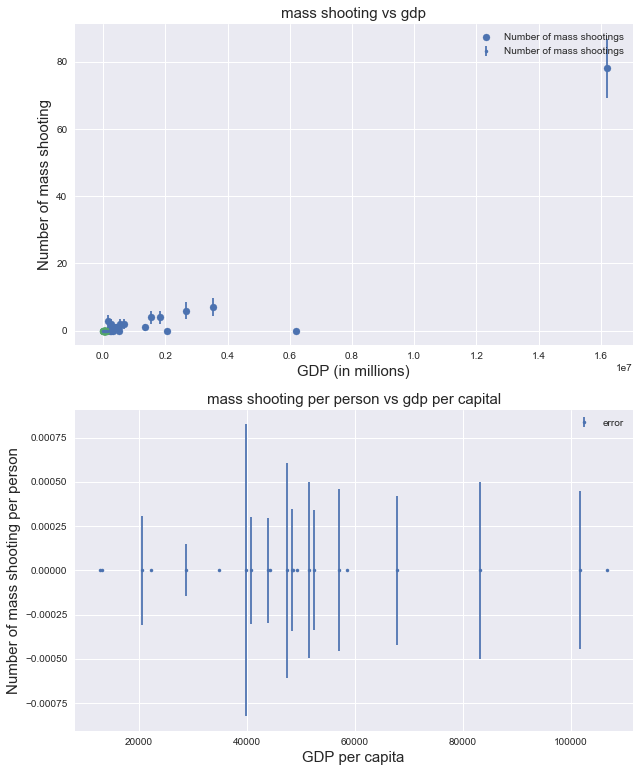

In [285]:
fig = pl.figure(figsize=(10,13)) 
gdp_p = df['gdp']/df['pop']
mass_p = df['Number of mass shootings'] / df['pop']
ax = fig.add_subplot(211)
scatter = ax.scatter(df.gdp / 1e6, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e6, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in millions)", fontsize = 15)
ax.set_ylabel("Number of mass shooting", fontsize = 15)
ax.set_title('mass shooting vs gdp',fontsize = 15)
ax.legend()

ax1 = fig.add_subplot(212)

scatter = ax.scatter(gdp_p, mass_p, label = "Number of mass shooting per person")
ax1.errorbar(gdp_p, mass_p, 
            yerr = np.sqrt(mass_p * 1.0), fmt = '.', label = 'error')
ax1.set_xlabel("GDP per capita",fontsize = 15)
ax1.set_ylabel("Number of mass shooting per person", fontsize = 15)
ax1.set_title('mass shooting per person vs gdp per capital',fontsize = 15)
ax1.legend()

## 2.2  plot the average number of civilian fire arms per person

first without errors, then with errors. are there points that look like outliers?

In [101]:
firearm_p = df['Average total all civilian firearms']/df['pop']

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


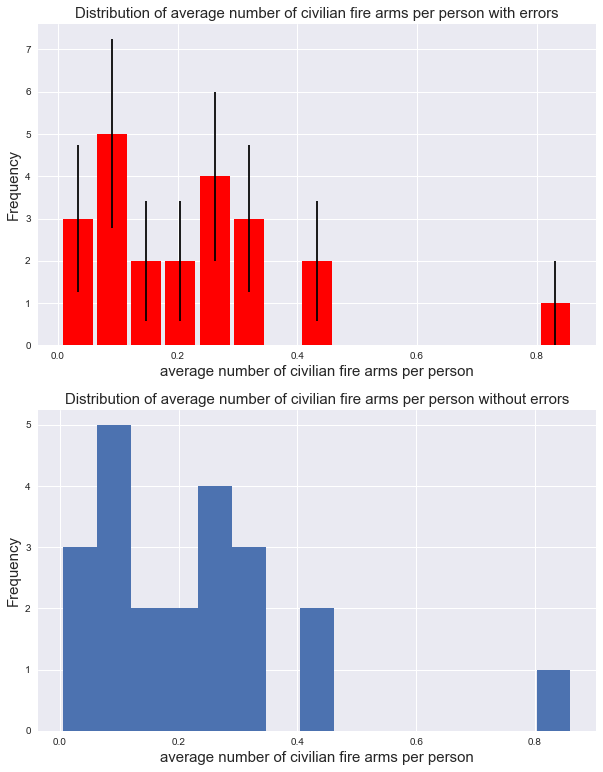

In [275]:
fig=plt.figure(figsize=(10,13))
ax = fig.add_subplot(211)

y,binEdges = np.histogram(firearm_p,bins=15)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
ax.bar(bincenters, y, width=width, color='r', yerr=menStd)
ax.set_xlabel("average number of civilian fire arms per person",fontsize=15)
ax.set_ylabel("Frequency",fontsize=15)
ax.set_title('Distribution of average number of civilian fire arms per person with errors',fontsize=15)

ax1 = fig.add_subplot(212)
ax1.hist(firearm_p, bins = 15)
ax1.set_xlabel("average number of civilian fire arms per person",fontsize=15)
ax1.set_ylabel("Frequency",fontsize=15)
ax1.set_title('Distribution of average number of civilian fire arms per person without errors',fontsize=15)
ax1.legend()

## 2.3 plot the average number of homicide by fire arms per person¶
first as a histogram
then against the country GDP, with statistical errors. are there points that look like outliers?

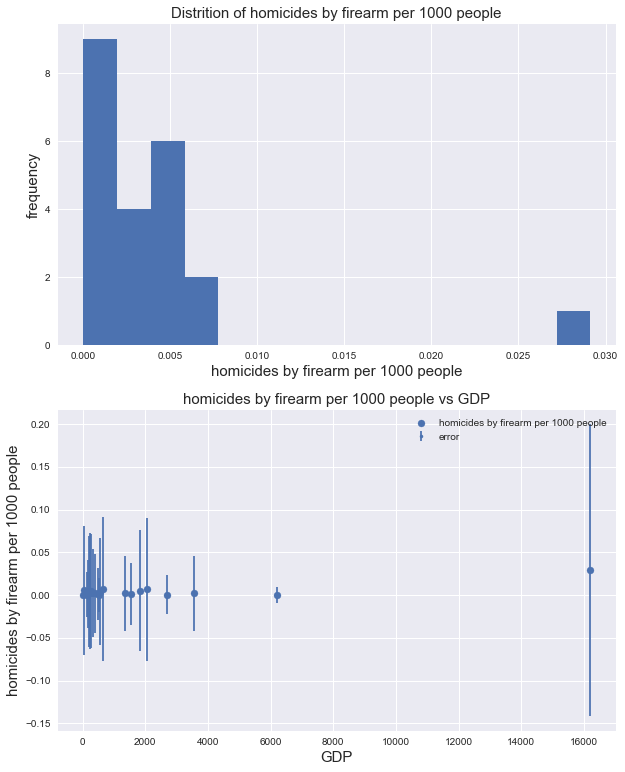

In [276]:
homcd_p = df['Number of homicides by firearm'] / df['pop'] * 1000
fig=plt.figure(figsize=(10,13))
ax = fig.add_subplot(211)
ax.hist( homcd_p, bins = 15)
ax.set_xlabel('homicides by firearm per 1000 people' , fontsize = 15)
ax.set_ylabel('frequency', fontsize = 15)
ax.set_title('Distrition of homicides by firearm per 1000 people', fontsize = 15)

ax1 = fig.add_subplot(212)
scatter = ax1.scatter(df['gdp']/ 1e9,homcd_p, label = 'homicides by firearm per 1000 people')
ax1.errorbar(df['gdp'] / 1e9, homcd_p, 
            yerr = np.sqrt(homcd_p), fmt = '.', label = 'error')
ax1.set_xlabel("GDP", fontsize = 15)
ax1.set_ylabel("homicides by firearm per 1000 people", fontsize = 15)
ax1.set_title('homicides by firearm per 1000 people vs GDP',fontsize = 15)
ax1.legend()

## 2.4  plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color
with and without errorbars

In [259]:
df['Country Name'].unique()

array(['Australia', 'Austria', 'Canada', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Luxembourg', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United States'], dtype=object)

(-457.31298442482233, 9603.3129844248251)

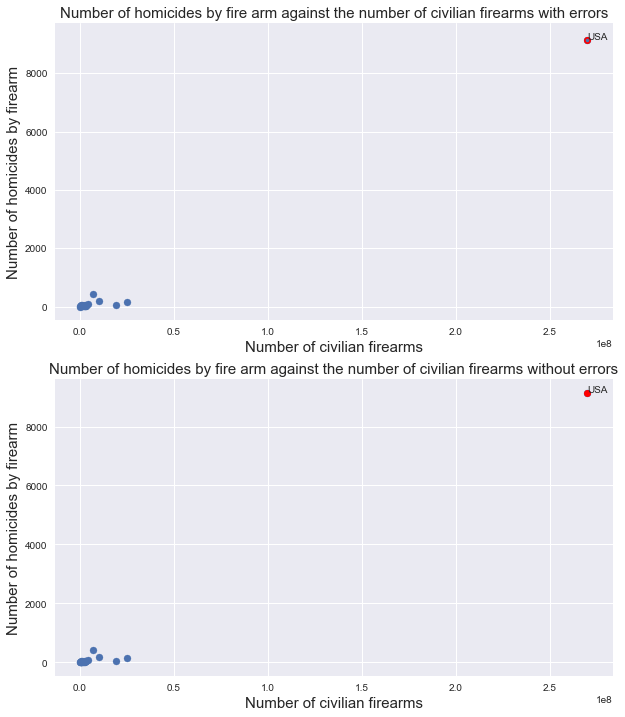

In [257]:
fig = pl.figure(figsize=(10,12)) 

ax = fig.add_subplot(211)
scatter = ax.scatter(df['Average total all civilian firearms'], df['Number of homicides by firearm'])
ax.errorbar(df['Average total all civilian firearms'], df['Number of homicides by firearm'], 
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.set_xlabel("Number of civilian firearms", fontsize = 15)
ax.set_ylabel("Number of homicides by firearm", fontsize = 15)
ax.set_title('Number of homicides by fire arm against the number of civilian firearms with errors',fontsize = 15)
ax.plot(df['Average total all civilian firearms'][df['Country Name']=='United States'], df['Number of homicides by firearm'][df['Country Name']=='United States'], 'ro')
ax.annotate('USA', xy=(df['Average total all civilian firearms'][21],df['Number of homicides by firearm'][21]))

ax1 = fig.add_subplot(212)
scatter = ax1.scatter(df['Average total all civilian firearms'], df['Number of homicides by firearm'])
ax1.set_xlabel("Number of civilian firearms", fontsize = 15)
ax1.set_ylabel("Number of homicides by firearm", fontsize = 15)
ax1.set_title('Number of homicides by fire arm against the number of civilian firearms without errors',fontsize = 15)
ax1.plot(df['Average total all civilian firearms'][df['Country Name']=='United States'], df['Number of homicides by firearm'][df['Country Name']=='United States'], 'ro')
ax1.annotate('USA', xy=(df['Average total all civilian firearms'][21],df['Number of homicides by firearm'][21]))

## 2.5  plot the number of mass shootings against the number of civilian firearms. plot the US in a different color
with and without errorbars

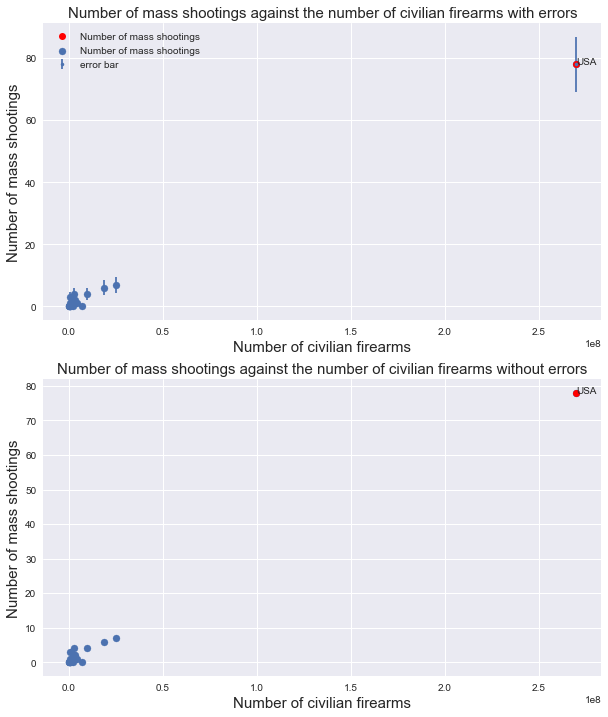

In [409]:
fig = pl.figure(figsize=(10,12)) 

ax = fig.add_subplot(211)
scatter = ax.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'], label = 'Number of mass shootings')
ax.errorbar(df['Average total all civilian firearms'], df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.', label = 'error bar')
ax.set_xlabel("Number of civilian firearms", fontsize = 15)
ax.set_ylabel("Number of mass shootings", fontsize = 15)
ax.set_title('Number of mass shootings against the number of civilian firearms with errors',fontsize = 15)
ax.plot(df['Average total all civilian firearms'][df['Country Name']=='United States'], df['Number of mass shootings'][df['Country Name']=='United States'], 'ro')
ax.annotate('USA', xy=(df['Average total all civilian firearms'][df['Country Name']=='United States'],df['Number of mass shootings'][df['Country Name']=='United States']))
ax.legend()

ax1 = fig.add_subplot(212)
scatter = ax1.scatter(df['Average total all civilian firearms'], df['Number of mass shootings'])
ax1.set_xlabel("Number of civilian firearms", fontsize = 15)
ax1.set_ylabel("Number of mass shootings", fontsize = 15)
ax1.set_title('Number of mass shootings against the number of civilian firearms without errors',fontsize = 15)
ax1.plot(df['Average total all civilian firearms'][df['Country Name']=='United States'], df['Number of mass shootings'][df['Country Name']=='United States'], 'ro')
ax1.annotate('USA', xy=(df['Average total all civilian firearms'][df['Country Name']=='United States'],df['Number of mass shootings'][df['Country Name']=='United States']))

## 3  Modeling
## 3.1  fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use
- statsmodels OLS
- statsmodels WLS
- seaborn
- choose one of
    -- creating a function that calculates the residuals and minimizing that function
    -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
    -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

In [287]:
firearm_p.mean()

0.22895008572891778

In [289]:
mass_p.mean() * 1e6

0.12102125439686046

In [290]:
mass_mp = mass_p * 1e6 # number of mass shooting per million people

## 3.1.1 OLS

In [299]:
lm1 = smf.ols(formula='mass_mp ~ firearm_p', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mass_mp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        13:38:40   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0315      0.051      0.612      0.548      -0.076       0.139
firearm_p      0.3911      0.175      2.230      0.037       0.025       0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

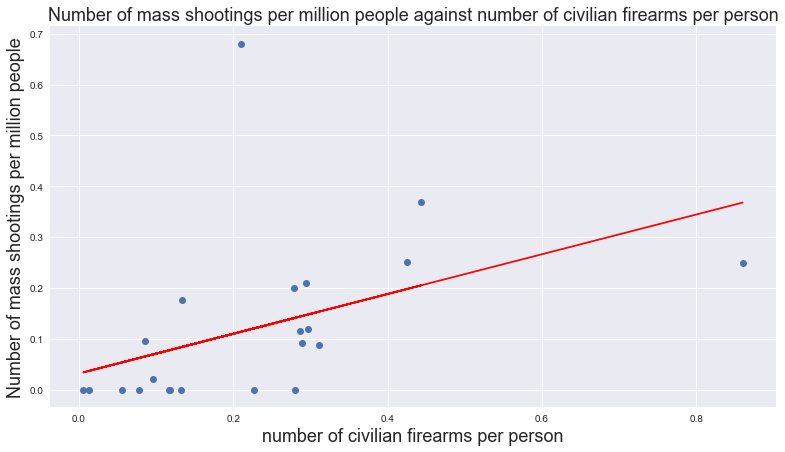

In [296]:
plt.figure(figsize=(13,7))
plt.plot( firearm_p, mass_mp, 'o')
plt.title('Number of mass shootings per million people against number of civilian firearms per person', fontsize = 18)
plt.xlabel('number of civilian firearms per person', fontsize = 18)
plt.ylabel('Number of mass shootings per million people', fontsize = 18)
plt.plot(firearm_p, lm1.predict(), '-r')

## 3.1.2 WLS

In [335]:
#weights = 1.0/df.yerror
#you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.
w = list(1.0 / np.sqrt(mass_mp))
for i in range(len(w)):
    if w[i] == inf:
        w[i] = 1

lm2 = smf.wls(formula='mass_mp ~ firearm_p', data=df, weights = w).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                mass_mp   R-squared:                       0.228
Model:                            WLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     5.915
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0245
Time:                        14:11:27   Log-Likelihood:                 14.272
No. Observations:                  22   AIC:                            -24.54
Df Residuals:                      20   BIC:                            -22.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0357      0.044      0.816      0.424      -0.056       0.127
firearm_p      0.3580      0.147      2.432      0.025       0.051       0.665
==============================================================================
Omnibus:                       28.903   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.630
Skew:                           2.372   Prob(JB):                     1.37e-12
Kurtosis:                       9.090   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.1.3 Seaborn plot

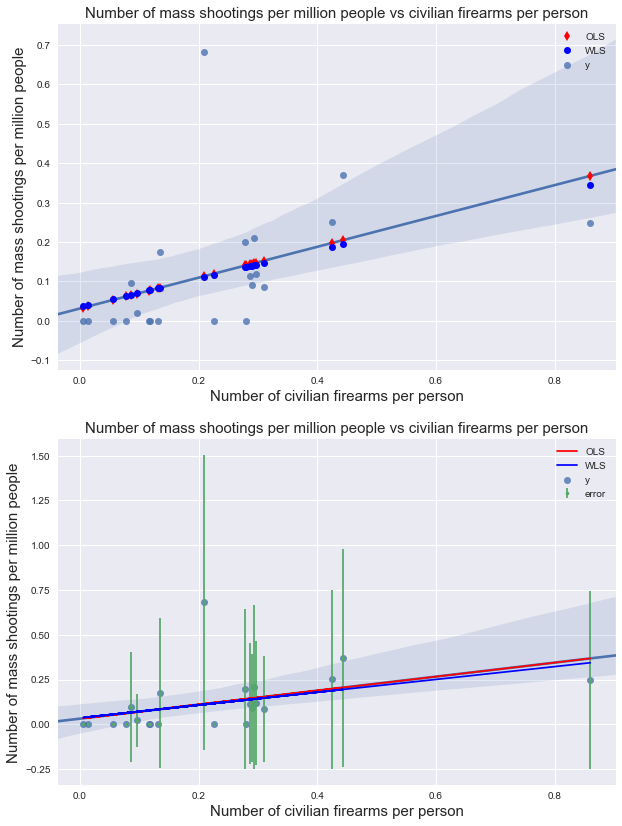

In [378]:
# plot OLS regression with fitted values
fig = pl.figure(figsize=(10,14))

ax = fig.add_subplot(211)
ax = sns.regplot(x= firearm_p, y=mass_mp, data=df, label='y')
ax.plot(firearm_p, lm1.predict(), 'rd', label='OLS')
ax.plot(firearm_p, lm2.predict(), 'bo', label='WLS')  

ax.set_xlabel('Number of civilian firearms per person', fontsize=15)
ax.set_ylabel('Number of mass shootings per million people', fontsize=15)
ax.set_title('Number of mass shootings per million people vs civilian firearms per person',fontsize=15)
ax.legend()

ax1 = fig.add_subplot(212)
ax1 = sns.regplot(x= firearm_p, y=mass_mp, data=df, label='y')
ax1.plot(firearm_p, lm1.predict(), '-r', label='OLS')
ax1.plot(firearm_p, lm2.predict(), '-b', label='WLS')
ax1.errorbar(firearm_p, mass_mp, 
            yerr = np.sqrt(mass_mp * 1.0), fmt = '.',label = 'error')

ax1.set_xlabel('Number of civilian firearms per person', fontsize=15)
ax1.set_ylabel('Number of mass shootings per million people', fontsize=15)
ax1.set_title('Number of mass shootings per million people vs civilian firearms per person',fontsize=15)
ax1.legend()

## 3.1.4 Polyfit
creating a function that calculates the residuals and minimizing that function

In [381]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
np.polyfit(firearm_p, mass_mp, 2)

array([-0.64809817,  0.88968475, -0.0268716 ])

#### Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error.
#### Polynomial coefficients = -0.64809817

## 3.2 Extra credit: calculate the confidence interval by hand and also plot them

you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)
Confidence intervals: there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) confidence interval of the model parameters slope and intercept: define sigma as the sum of the residuals over the square root of number n of observations.

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom 
(you can calculate it with scipy tp = sp.stats.t.ppf(0.975, n-2)

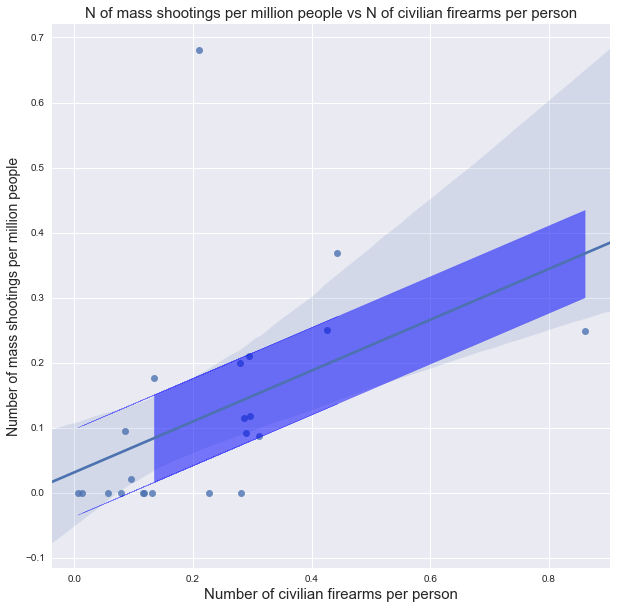

In [398]:
# sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)
sigma = np.sqrt(sum((mass_mp - lm1.predict()) ** 2) / n)

#t distribution with n-2 degrees of freedom
tp = sp.stats.t.ppf(0.975, n-2)

# a = tp * sqrt(sigma^2 /(n-2)) Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")
ci = tp * np.sqrt(sigma ** 2 / (n - 2)) 


pl.figure(figsize=(10, 10))
sns.regplot(firearm_p, y= mass_mp, data=df)
pl.xlabel('Number of civilian firearms per person', fontsize=15)
pl.ylabel('Number of mass shootings per million people', fontsize=14)
pl.title('N of mass shootings per million people vs N of civilian firearms per person', fontsize=15)
#pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)
pl.fill_between(firearm_p, lm1.predict() - ci, lm1.predict() + ci, color='b', alpha=0.5)

  ## 3.3 Use the stsatsmodels.gaphics package to plot the influence plot

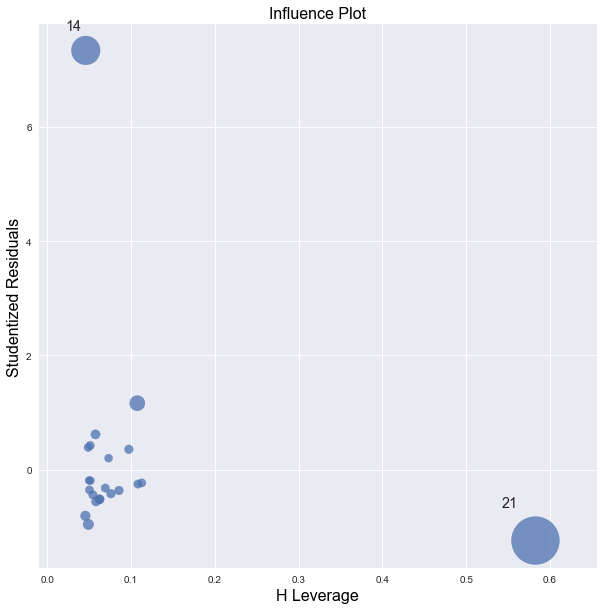

In [401]:
pl.figure(figsize=(6,6))
sm.graphics.influence_plot(lm1, alpha=0.05, criterion="cooks");

Read the package documentation to learn how to read this plot and extract the countries with the highest influence

In [404]:
df['Country Name'].iloc[[14,21]]

14      New Zealand
21    United States
Name: Country Name, dtype: object

#### https://analyse-it.com/docs/user-guide/fitmodel/linear/outliersinfluence
An influence plot shows the outlyingness, leverage, and influence of each case.

The plot shows the residual on the vertical axis, leverage on the horizontal axis, and the point size is the square root of Cook's D statistic, a measure of the influence of the point.

Outliers are cases that do not correspond to the model fitted to the bulk of the data. You can identify outliers as those cases with a large residual (usually greater than approximately +/- 2), though not all cases with a large residual are outliers and not all outliers are bad. Some of the most interesting cases may be outliers.

Leverage is the potential for a case to have an influence on the model. You can identify points with high leverage as those furthest to the right. A point with high leverage may not have much influence on the model if it fits the overall model without that case.

Influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded. Points with a large residual and high leverage have the most influence. They can have an adverse effect on (perturb) the model if they are changed or excluded, making the model less robust. Sometimes a small group of influential points can have an unduly large impact on the fit of the model.

#### New Zealand has high residuals and low leverge, so that it can be identified as an outliner of the dataset. United States has a high leverage but low residual, so that it has a big potential to influence the model.
#### Since the size of point representing 'United States' is the biggest, we can conclude that it has the highest influence.

## 3.4 Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## 3.5 Discuss your findings